<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

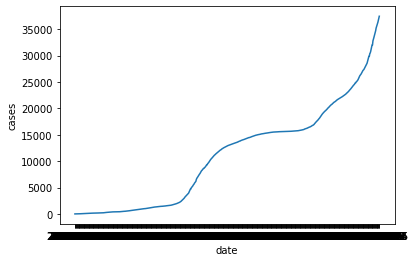

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
ohio = df[(df['state']=='Ohio')& (df['county'] == 'Medina')]

sns.lineplot(data = ohio, x = 'date' , y = 'cases')




:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [27]:
data.head()

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2022-01-17,Autauga,Alabama,1001.0,12624,163.0,10170.0,145.0,2454.0,18.0
1,2022-01-17,Baldwin,Alabama,1003.0,46528,605.0,32493.0,413.0,14035.0,192.0
2,2022-01-17,Barbour,Alabama,1005.0,4684,83.0,2635.0,59.0,2049.0,24.0
3,2022-01-17,Bibb,Alabama,1007.0,5274,95.0,3602.0,64.0,1672.0,31.0
4,2022-01-17,Blount,Alabama,1009.0,12520,203.0,9295.0,167.0,3225.0,36.0


In [28]:
data.shape

(3253, 10)

In [29]:
data.info

<bound method DataFrame.info of             date      county  ... probable_cases  probable_deaths
0     2022-01-17     Autauga  ...         2454.0             18.0
1     2022-01-17     Baldwin  ...        14035.0            192.0
2     2022-01-17     Barbour  ...         2049.0             24.0
3     2022-01-17        Bibb  ...         1672.0             31.0
4     2022-01-17      Blount  ...         3225.0             36.0
...          ...         ...  ...            ...              ...
3248  2022-01-17  Sweetwater  ...          855.0              NaN
3249  2022-01-17       Teton  ...          192.0              NaN
3250  2022-01-17       Uinta  ...          604.0              NaN
3251  2022-01-17    Washakie  ...          584.0              NaN
3252  2022-01-17      Weston  ...          315.0              NaN

[3253 rows x 10 columns]>

In [30]:
#The average confirmed deaths from corona today from all the counties

average_death = data['confirmed_deaths'].mean()

average_death

331.7128404669261

In [31]:
#The average corona confirmed cases today from all the counties

average_cases = data['confirmed_cases'].mean()

average_cases

18690.721718377088

In [32]:
#The total confirmed corona cases as of right now

total_cases = data['confirmed_cases'].sum()

total_cases

39157062.0

# Task4: Understand NY covid 19 data in last 30 days

In [81]:
december_18 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv')

new_york = december_18[(december_18['state']=='New York') & (december_18['date']=="2021-12-18")]

In [84]:
#Total cases in New York as of December 18, 2021

dec_ny_cases = new_york['cases'].sum()

#The total deaths in New York as of December 18, 2021

dec_ny_deaths = new_york['deaths'].sum()

print(dec_ny_cases)
print(dec_ny_deaths)


2928229
58037.0


In [85]:
january_17 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')

new_york_jan17 = january_17[(january_17['state']=='New York')]

In [86]:
#Total cases in New York as of January 17, 2022

jan_ny_cases = new_york_jan17['cases'].sum()

#The total deaths in New York as of January 17, 2022

jan_ny_deaths = new_york_jan17['deaths'].sum()

print(jan_ny_cases)
print(jan_ny_deaths)

4507601
61259.0


In [91]:
#The total increase in cases in the last 30 days in NY

total_increase_cases = jan_ny_cases-dec_ny_cases
total_increase_cases

1579372

In [92]:
#The total increase in deaths in the last 30 days in NY

total_increase_deaths = jan_ny_deaths-dec_ny_deaths
total_increase_deaths

3222.0

In [93]:
#The average number of cases in the last 30 days in Ny

avg_cases = total_increase_cases/30
avg_cases

52645.73333333333

In [95]:
#The average number of deaths in the last 30 days in NY 

avg_deaths = total_increase_deaths/30
avg_deaths

107.4

# Comparing Covid 19 data with different states

In [98]:
us_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv')

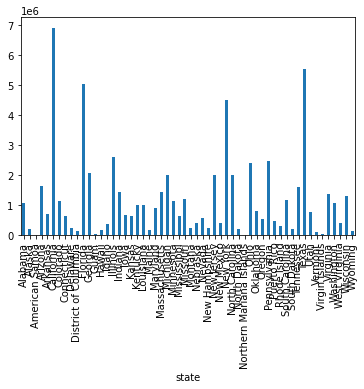

In [118]:
#Total cases in each state

state_cases = us_states.groupby(by=["state"])["cases"].sum()
state_cases

state_cases.plot(x='state',y='cases',kind='bar')

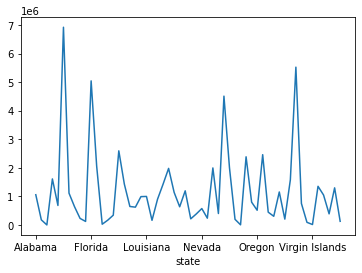

In [119]:
#The total deaths in each state
state_deaths = us_states.groupby(by=["state"])["deaths"].sum()
state_deaths

state_cases.plot(x='state',y='deaths',kind='line')

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     California, New York, and Texas are the states with the most covid cases.
2.   Conclusion 2
     In the last 30 days, covid cases and deaths have more than doubled in New York.

